In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from config import PATH

df = pd.read_csv(PATH, index_col=0)

In [2]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [3]:
df.info()
display(df.describe())
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7510522 entries, 0 to 7510521
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userid     object        
 1   sessionid  int64         
 2   timestamp  datetime64[ns]
 3   action     object        
 4   value      float64       
 5   category   object        
 6   age        int64         
 7   gender     object        
 8   city       object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 573.0+ MB


,sessionid,value,age
count,7.510522e+06,7.510522e+06,7.510522e+06
mean,2.805611e+02,2.069225e+03,3.598401e+01
std,1.617851e+02,7.412838e+03,1.826152e+01
min,1.000000e+00,0.000000e+00,7.000000e+00
25%,1.410000e+02,0.000000e+00,2.100000e+01
50%,2.810000e+02,0.000000e+00,3.400000e+01
75%,4.200000e+02,0.000000e+00,4.800000e+01
max,5.860000e+02,2.116800e+05,8.100000e+01


,userid,sessionid,timestamp,action,value,category,age,gender,city
0,user_10000,1,2021-12-30 12:28:45,category,0.000000,Товары для детей,42,Ж,Красноярск
1,user_10000,1,2021-12-30 12:29:10,search,0.000000,Товары для детей,42,Ж,Красноярск
2,user_10000,1,2021-12-30 12:29:25,product,0.000000,Товары для детей,42,Ж,Красноярск
3,user_10000,1,2021-12-30 12:29:26,search,0.000000,Товары для детей,42,Ж,Красноярск
4,user_10000,1,2021-12-30 12:29:34,search,0.000000,Товары для детей,42,Ж,Красноярск
5,user_10000,1,2021-12-30 12:29:46,product,0.000000,Товары для детей,42,Ж,Красноярск
6,user_10000,1,2021-12-30 12:30:14,search,0.000000,Товары для детей,42,Ж,Красноярск
7,user_10000,1,2021-12-30 12:30:45,category,0.000000,Товары для детей,42,Ж,Красноярск
8,user_10000,1,2021-12-30 12:30:48,cart,5735.262266,Авто/мото товары,42,Ж,Красноярск
9,user_10000,1,2021-12-30 12:30:52,checkout,6130.000000,None,42,Ж,Красноярск


In [5]:
a = df.nunique()

print(a)

userid          2500
sessionid        586
timestamp    7168835
action             7
value         170213
category           7
age               75
gender             2
city              14
dtype: int64


In [12]:
names = ['city', 'age', 'gender', 'category']

for name in names:
    print(df[name].value_counts())

Москва             2104849
Санкт-Петербург     948642
Новосибирск         575670
Екатеринбург        543015
Нижний Новгород     428970
Казань              395626
Красноярск          352194
Волгоград           333001
Ростов-на-Дону      330872
Самара              324321
Челябинск           297719
Воронеж             294179
Омск                292162
Уфа                 289302
Name: city, dtype: int64
35    192778
25    179308
29    174444
32    173640
23    171297
       ...  
78     32809
77     32777
79     27145
80     18090
81     15053
Name: age, Length: 75, dtype: int64
Ж    4342998
М    3167524
Name: gender, dtype: int64
Товары для детей                 1172161
None                             1111681
Красота и здоровье               1109183
Одежда и обувь                   1105299
Электроника и бытовая техника    1008813
Авто/мото товары                 1004535
Продовольственные товары          998850
Name: category, dtype: int64


<Figure size 1600x1100 with 0 Axes>

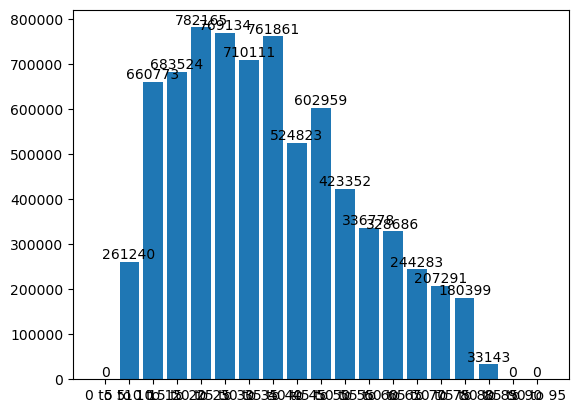

In [31]:
name = 'age'  # age sessionid

# bins = list(range(0, 90, 5))
# bins = list(range(0, 700, 50))

n, _ = np.histogram(df[name], bins=bins)
labels = [f'{a} to {b}' for a, b in zip(bins, bins[1:])]

plt.figure(figsize = (16, 11))
fig, ax = plt.subplots()
bar = ax.bar(labels, n)
_ = ax.bar_label(bar)
plt.show()

<Figure size 1600x1100 with 0 Axes>

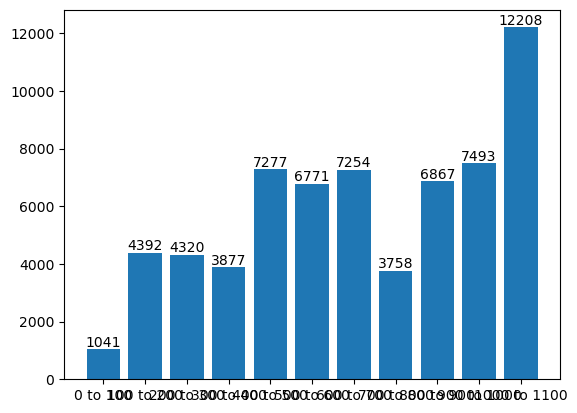

[ 1041  4392  4320  3877  7277  6771  7254  3758  6867  7493 12208]


In [52]:
# df['days'] = df['timestamp'] - df['timestamp'].min()
# df['days'] = df['days'].apply(lambda x: x.days)

bins = list(range(0, 1150, 100))

n, _ = np.histogram(df['days'], bins=bins)
labels = [f'{a} to {b}' for a, b in zip(bins, bins[1:])]
n -= 675000

plt.figure(figsize = (16, 11))
fig, ax = plt.subplots()
bar = ax.bar(labels, n)
_ = ax.bar_label(bar)
plt.show()

print(n)

In [48]:
# df['days'] = df['timestamp'].apply(lambda x: (x - df['timestamp'].min()).dt.days)
# (df['timestamp'][1] - df['timestamp'][6]).days
print(df['days'])

0             3
1             3
2             3
3             3
4             3
           ... 
7510517    1102
7510518    1102
7510519    1102
7510520    1102
7510521    1102
Name: days, Length: 7510522, dtype: int64


In [54]:
df[df.duplicated(keep=False)]

C:\Users\rusan\AppData\Local\Temp\ipykernel_16032\1369383012.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.duplicated(keep=False)][df['value'] > 0]


,userid,sessionid,timestamp,action,value,category,age,gender,city,days
